<a href="https://colab.research.google.com/github/raphael-salatiel/AI-Project/blob/main/AI_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AI Project NoteBook

In [1]:
!pip install datasets evaluate transformers[sentencepiece]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 521.2/521.2 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 14.1 MB/s eta 0:00:00


# Here we will find a translator between French and English

In [2]:
from transformers import pipeline

translator = pipeline("translation", model="Helsinki-NLP/opus-mt-fr-en")
translator("Ce texte a bine été traduit pour que Mike le comprenne !")

config.json:   0%|          | 0.00/1.42k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/301M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/802k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/778k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.34M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:197: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


[{'translation_text': 'This text has been translated so Mike understands it!'}]

# Here we have a model that can complete a sentence


In [9]:
from transformers import pipeline

classifier = pipeline("fill-mask")
classifier("Mike is the best <mask> of Baruch college.")



No model was supplied, defaulted to distilroberta-base and revision ec58a5b (https://huggingface.co/distilroberta-base).
Using a pipeline without specifying a model name and revision in production is not recommended.
Some weights of the model checkpoint at distilroberta-base were not used when initializing RobertaForMaskedLM: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


[{'score': 0.26520979404449463,
  'token': 1441,
  'token_str': ' friend',
  'sequence': 'Mike is the best friend of Baruch college.'},
 {'score': 0.11590015143156052,
  'token': 1294,
  'token_str': ' student',
  'sequence': 'Mike is the best student of Baruch college.'},
 {'score': 0.11124737560749054,
  'token': 5318,
  'token_str': ' graduate',
  'sequence': 'Mike is the best graduate of Baruch college.'},
 {'score': 0.0242371316999197,
  'token': 704,
  'token_str': ' coach',
  'sequence': 'Mike is the best coach of Baruch college.'},
 {'score': 0.022339539602398872,
  'token': 11417,
  'token_str': ' administrator',
  'sequence': 'Mike is the best administrator of Baruch college.'}]

# Here we have a model that can estimate the depth of an image we give him

In [13]:
from transformers import pipeline

estimator = pipeline(task="depth-estimation", model="Intel/dpt-large")
# result = estimator(images="https://cdn.shopify.com/s/files/1/0490/8384/2713/files/2.-Le-chat-Bengal-le-leopard_600x600.jpg?v=1672839840")
result = estimator(images="https://s.abcnews.com/images/US/us-open-tennis-1-gty-gmh-230906_1694029701894_hpMain_16x9_1600.jpg")
result


Some weights of DPTForDepthEstimation were not initialized from the model checkpoint at Intel/dpt-large and are newly initialized: ['neck.fusion_stage.layers.0.residual_layer1.convolution2.bias', 'neck.fusion_stage.layers.0.residual_layer1.convolution1.weight', 'neck.fusion_stage.layers.0.residual_layer1.convolution2.weight', 'neck.fusion_stage.layers.0.residual_layer1.convolution1.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


{'predicted_depth': tensor([[[0.4697, 0.4923, 0.4822,  ..., 0.1965, 0.2136, 0.0687],
          [0.4654, 0.4879, 0.4779,  ..., 0.1904, 0.2803, 0.2452],
          [0.4803, 0.4805, 0.4805,  ..., 0.1739, 0.2264, 0.2422],
          ...,
          [3.5779, 3.6387, 3.6885,  ..., 4.3314, 4.3247, 4.3402],
          [3.6783, 3.6411, 3.6804,  ..., 4.2886, 4.3020, 4.3429],
          [3.8478, 3.5626, 3.6672,  ..., 4.5123, 4.6093, 4.7759]]]),
 'depth': <PIL.Image.Image image mode=L size=1600x900>}

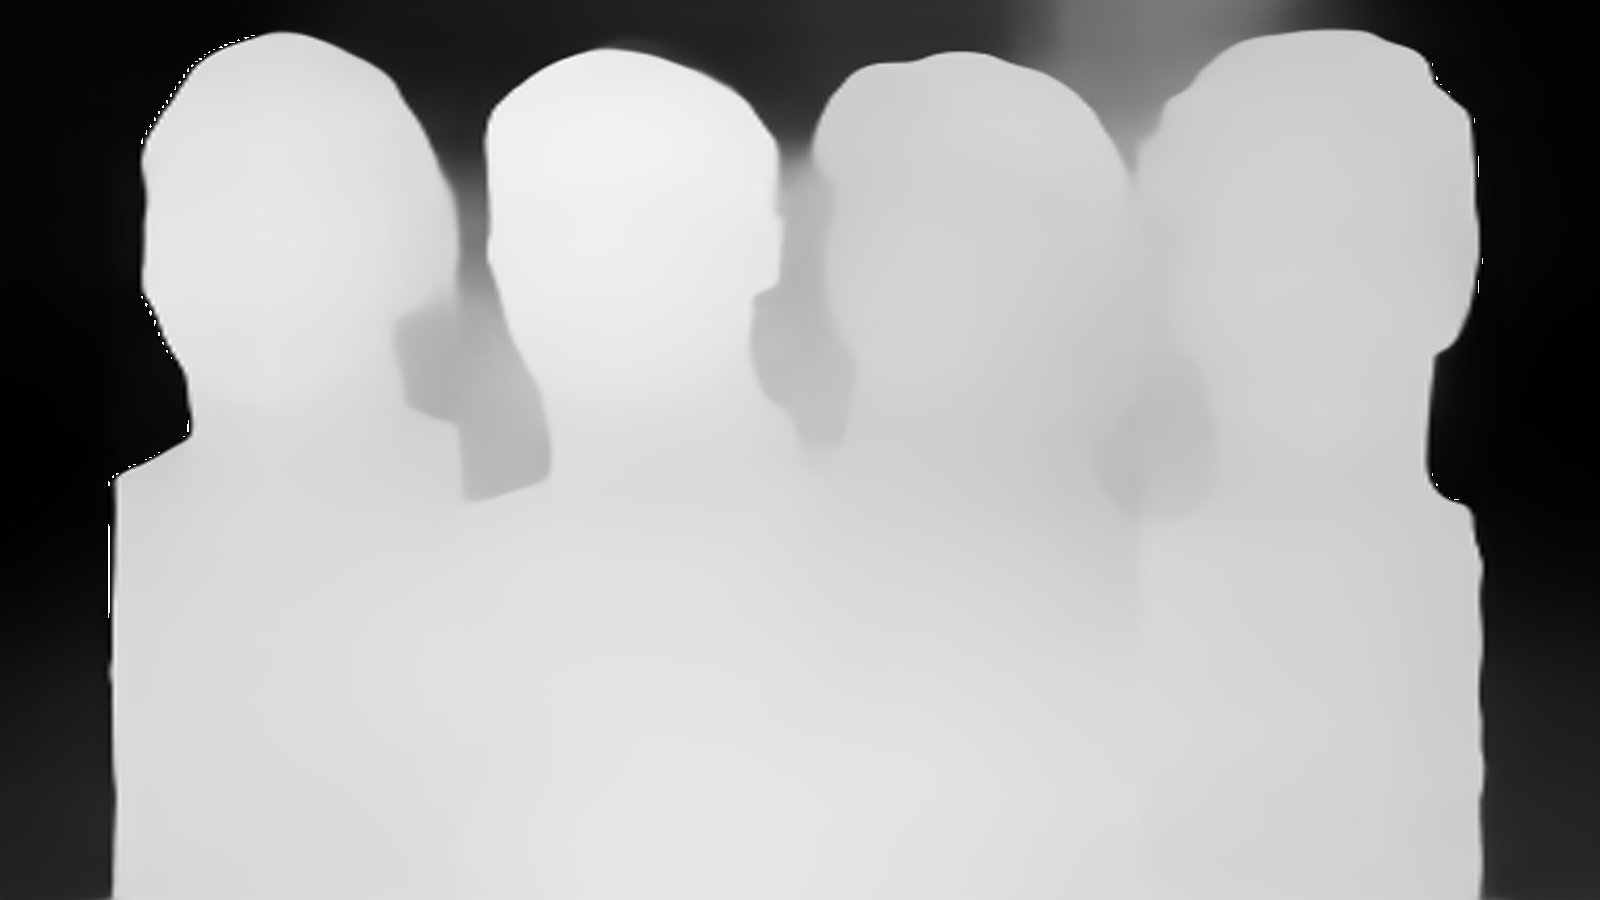

In [14]:
result["depth"]

# Here we have a model that can identify the spieces of cats


In [17]:
from transformers import pipeline
clf = pipeline("image-classification")
clf("https://media.istockphoto.com/id/1443562748/fr/photo/mignon-chat-gingembre.jpg?s=612x612&w=0&k=20&c=ygNVVnqLk9V8BWu4VQ0D21u7-daIyHUoyKlCcx3K1E8=")

[{'label': 'tabby cat', 'score': 0.731},
...
]


No model was supplied, defaulted to google/vit-base-patch16-224 and revision 5dca96d (https://huggingface.co/google/vit-base-patch16-224).
Using a pipeline without specifying a model name and revision in production is not recommended.


[{'label': 'tabby cat', 'score': 0.731}, Ellipsis]